In [22]:
import os
import csv

from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

from random import shuffle

font_file = '/root/bryton/aquabyte_sealice/Keyboard.ttf'
font = ImageFont.truetype(font_file, 20)

In [4]:
# load images

annotations_file = '/root/data/lice_data/annotations/training/annotations.csv'

f = open(annotations_file, 'rb')
reader = csv.reader(f)
lice_data = [ row[0].split() for row in reader]

#print lice_data[0]

labelsToTextDict = {
    0: 'AFLice',
    1: 'OLice',
    2: 'Lice',
    -1: 'Not_AFLice',
    -2: 'Not_OLice'
}

def labelsToText(label):
    return labelsToTextDict[label]

def classifyLice(label):
    if 'Not_AFLice' in label:
        return -1
    elif 'Not_OLice' in label:
        return -2
    elif 'Not_Olice' in label:
        return -2
    elif 'AFLice' in label:
        return 0
    elif 'OLice' in label:
        return 1
    elif 'Olice' in label:
        return 1
    elif 'Lice' in label:
        return 2
    else:
        print label
        
lice_data = [ (row[0], int(row[1]), int(row[2]), int(row[3]), int(row[4]), classifyLice(row[5])) for row in lice_data]

print lice_data[0]

('/root/data/lice_data/frames/testfile_piece_25/testfile_piece_25_37.png', 1255, 1048, 1274, 1056, 0)


0: [0, 0]
5: [8, 1]
10: [10, 2]
15: [11, 2]
20: [12, 3]
25: [14, 4]
30: [16, 4]
35: [17, 5]
40: [19, 6]
45: [20, 6]
50: [21, 7]
55: [22, 8]
60: [24, 9]
65: [26, 10]
70: [28, 11]
75: [31, 12]
80: [34, 14]
85: [38, 17]
90: [43, 19]
95: [51, 23]
100: [108, 77]
Only 14 annotations that are in the 95th percentile for width and height


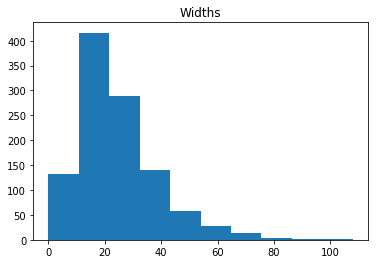

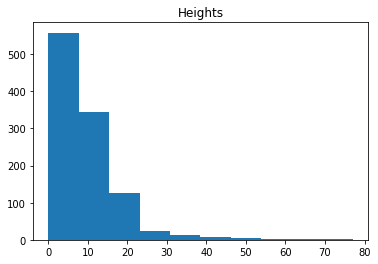

In [5]:
widths = []
heights = []

for annotation in lice_data:
    image_filename, x1, y1, x2, y2, label = annotation

    w = x2 - x1
    h = y2 - y1
    
    widths.append(w)
    heights.append(h)

dimensions = np.array(list(zip(widths, heights)))
    
for percentile in xrange(0, 105, 5):
    width_percentile = np.percentile(widths, percentile)
    height_percentile = np.percentile(heights, percentile)
    
    print '%i: [%i, %i]' % (percentile, width_percentile, height_percentile)
    
width_percentile = np.percentile(widths, 95)
height_percentile = np.percentile(heights, 95)

subset = np.where((dimensions[:,0] >= width_percentile) & (dimensions[:,1] >= height_percentile))

print 'Only %i annotations that are in the 95th percentile for width and height' % (len(subset[0]), )

plt.hist(widths)
plt.title('Widths')
plt.show()

plt.hist(heights)
plt.title('Heights')
plt.show()

('/root/data/lice_data/frames/testfile_piece_02/testfile_piece_02_320.png', 1236, 354, 1293, 403, 2) Lice
('/root/data/lice_data/frames/testfile_piece_02/testfile_piece_02_995.png', 465, 109, 552, 142, 2) Lice
('/root/data/lice_data/frames/testfile_piece_17/testfile_piece_17_50.png', 1468, 149, 1520, 213, -2) Not_OLice
('/root/data/lice_data/frames/testfile_piece_07/testfile_piece_07_1281.png', 573, 767, 648, 811, -2) Not_OLice
('/root/data/lice_data/frames/testfile_piece_28/testfile_piece_28_905.png', 1759, 801, 1833, 837, 0) AFLice
('/root/data/lice_data/frames/testfile_piece_29/testfile_piece_29_58.png', 1368, 692, 1422, 723, 0) AFLice
('/root/data/lice_data/frames/testfile_piece_29/testfile_piece_29_231.png', 1660, 781, 1713, 809, -1) Not_AFLice
('/root/data/lice_data/frames/testfile_piece_10/testfile_piece_10_137.png', 51, 697, 122, 774, 2) Lice
('/root/data/lice_data/frames/testfile_piece_10/testfile_piece_10_197.png', 1073, 811, 1166, 845, 2) Lice
('/root/data/lice_data/frames/t

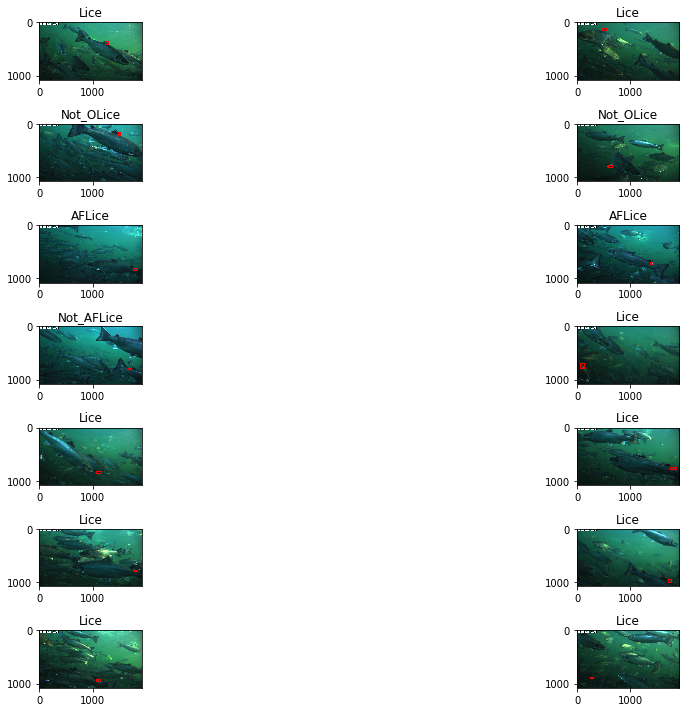

In [7]:
sample_annotations = [ lice_data[index] for index in subset[0] ]

# This is the one I had send to Preben previously
#print lice_data[100]

f, ax = plt.subplots(7, 2, figsize = (20, 10))

for index, sample_annotation in enumerate(sample_annotations):
    image_filename, x1, y1, x2, y2, label = sample_annotation

    ax[index / 2, index % 2].imshow(np.array(Image.open(image_filename)))

    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')

    ax[index / 2, index % 2].add_patch(rect)
    
    labelText = labelsToText(label)
    
    ax[index / 2, index % 2].set_title(labelText)

    print sample_annotation, labelText
    
plt.tight_layout()
plt.show()

In [23]:
output_directory = '/root/bryton/aquabyte_sealice/preben_output'

try: 
    os.makedirs(output_directory)
except OSError:
    if not os.path.isdir(output_directory):
        raise
        
for index, sample_annotation in enumerate(sample_annotations):
    image_filename, x1, y1, x2, y2, label = sample_annotation
    
    labelText = labelsToText(label)
    
    split_name = image_filename.split('/')
    print split_name[6].split('.')[0]
    
    image = Image.open(image_filename)
    
    draw = ImageDraw.Draw(image)
    
    draw.text((x1, y1 - 10), labelText, (255,255,0), font = font)
    draw.rectangle(((x1, y1), (x2, y2)), outline="red")
   
    output_file = '%s/%s.jpg' % (output_directory, split_name[6].split('.')[0])
    
    image.save(output_file)

testfile_piece_02_320
testfile_piece_02_995
testfile_piece_17_50
testfile_piece_07_1281
testfile_piece_28_905
testfile_piece_29_58
testfile_piece_29_231
testfile_piece_10_137
testfile_piece_10_197
testfile_piece_10_727
testfile_piece_10_1061
testfile_piece_10_0
testfile_piece_06_197
testfile_piece_04_135


In [64]:
shuffle(lice_data)

for label in [-2, -1, 0, 1, 2]:
    print 'Percent %s: %0.2f' % (labelsToText(label), np.average([1 if row[5] == label else 0 for row in lice_data]))

percent_train = 0.7
threshold = int(percent_train * len(lice_data))

print '%i out of %i' % (threshold, len(lice_data))

trainSet = lice_data[:threshold]
testSet = lice_data[(threshold + 1):]

for annotation in trainSet:
    pass # train the model here

'''
Assume we train something here
'''

def classifyPatch(x1, y1, x2, y2):
    return 1


Percent Not_OLice: 0.25
Percent Not_AFLice: 0.07
Percent AFLice: 0.17
Percent OLice: 0.14
Percent Lice: 0.37
757 out of 1082


In [65]:
'''
Validate it on the test set
'''

results = []

for annotation in testSet:
    image_filename, x1, y1, x2, y2, true_label = annotation
    predicted_label = classifyPatch(x1, y1, x2, y2)
    results.append(predicted_label == true_label)
    
print np.mean(results)

0.1574074074074074
